In [1]:
# Importing all usefull libraries for this notebook
import numpy as np
import gravmag as gmc
import datafiltering as df
import matplotlib.pyplot as plt

In [2]:
# Defines number of points
x = np.linspace(-1000, 1000, 200)
y = x
z = -10.#np.random.normal(loc = -10., scale = 0.5, size = x.size)

# Creates the grid
X, Y = np.meshgrid(x, y)

modelmag = (-100., 100., -100., 100., 20., 120., 2.3)

In [3]:
# Computes the potential data
tf = gmc.prism_tf(X, Y, z, modelmag, [-45., 30.], [-45., 30])

In [4]:
# Create the intervals for inclination and declination
inc = np.linspace(-20., -90., 100)
dec = np.linspace(-100., 100., 100)

ni, nd = inc.size, dec.size
# Create the grid
Dec, Inc = np.meshgrid(dec, inc)

In [11]:
# Create the array to allocate the result
res1 = np.zeros([ni, nd])
#res2 = np.zeros([ni, nd])
#res3 = np.zeros([ni, nd])
for j in range(nd):
    for i in range(ni):
        rtp = df.reduction(x, y, tf,(-45.0, 30,0), (inc[i], dec[j]), (-90., 0.), (-90., 0.))
        pseudinho = df.pseudograv(x, y, rtp, (-45.0, 30.0), (inc[i], dec[j]), 2673., 2.3)
        #hga = df.totalgrad(x, y, rtp)
        #tilt = df.tilt(x, y, rtp)
        #dz = df.zderiv(x, y, rtp, 2)
        res1[i,j] = cc(rtp, pseudinho)
        #res2[i,j] = cc(rtp, tilt)
        #res3[i,j] = cc(tilt, hga)

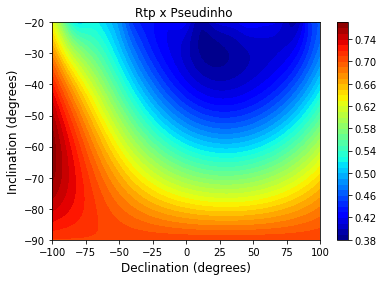

"\nplt.figure()\nplt.contourf(Dec, Inc, res2, 40,cmap = plt.cm.jet)\nplt.title('Rtp x Tilt(rtp) ', fontsize = 12)\nplt.xlabel('Declination (degrees)',fontsize = 12)\nplt.ylabel('Inclination (degrees)',fontsize = 12)\nplt.colorbar()\nplt.show()\n\n\nplt.figure()\nplt.contourf(Dec, Inc, res3, 40,cmap = plt.cm.jet)\nplt.title('Tilt(rtp) x hgrad(rtp) ', fontsize = 12)\nplt.xlabel('Declination (degrees)',fontsize = 12)\nplt.ylabel('Inclination (degrees)',fontsize = 12)\nplt.colorbar()\nplt.show()\n"

In [12]:
plt.figure()
plt.contourf(Dec, Inc, res1, 40,cmap = plt.cm.jet)
plt.title('Rtp x Pseudinho ', fontsize = 12)
plt.xlabel('Declination (degrees)',fontsize = 12)
plt.ylabel('Inclination (degrees)',fontsize = 12)
plt.colorbar()
plt.show()

'''
plt.figure()
plt.contourf(Dec, Inc, res2, 40,cmap = plt.cm.jet)
plt.title('Rtp x Tilt(rtp) ', fontsize = 12)
plt.xlabel('Declination (degrees)',fontsize = 12)
plt.ylabel('Inclination (degrees)',fontsize = 12)
plt.colorbar()
plt.show()


plt.figure()
plt.contourf(Dec, Inc, res3, 40,cmap = plt.cm.jet)
plt.title('Tilt(rtp) x hgrad(rtp) ', fontsize = 12)
plt.xlabel('Declination (degrees)',fontsize = 12)
plt.ylabel('Inclination (degrees)',fontsize = 12)
plt.colorbar()
plt.show()
'''

In [ ]:
plt.figure()
plt.contourf(Dec, Inc, res1, 40,cmap = plt.cm.jet)
plt.title('Rtp x hgrad(rtp) ', fontsize = 12)
plt.xlabel('Declination (degrees)',fontsize = 12)
plt.ylabel('Inclination (degrees)',fontsize = 12)
plt.colorbar()
plt.show()

plt.figure()
plt.contourf(Dec, Inc, res2, 40,cmap = plt.cm.jet)
plt.title('Rtp x Tilt(rtp) ', fontsize = 12)
plt.xlabel('Declination (degrees)',fontsize = 12)
plt.ylabel('Inclination (degrees)',fontsize = 12)
plt.colorbar()
plt.show()


plt.figure()
plt.contourf(Dec, Inc, res3, 40,cmap = plt.cm.jet)
plt.title('Tilt(rtp) x hgrad(rtp) ', fontsize = 12)
plt.xlabel('Declination (degrees)',fontsize = 12)
plt.ylabel('Inclination (degrees)',fontsize = 12)
plt.colorbar()
plt.show()
